In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

# Reading the dataset
dataset = pd.read_csv("wdbc.data", sep=",").values

# Forming a data frame 
attributes = ["ID","Diagnosis","mean_radius","mean_texture","mean_perimeter","mean_area","mean_smoothness","mean_compactness","mean_concavity","mean_concave_points","mean_symmetry","mean_fractal_dimension","se_radius","se_texture","se_perimeter","se_area","se_smoothness","se_compactness","se_concavity","se_concave_points","se_symmetry","se_fractal_dimension",
            "worst_radius","worst_texture","worst_perimeter","worst_area","worst_smoothness","worst_compactness","worst_concavity","worst_concave_points","worst_symmetry","worst_fractal_dimension"]
data = pd.DataFrame(data=dataset,columns=attributes)
data.set_index("ID", inplace=True)

# Displaying the diagnosis(M = malignant, B = benign) and the 30 real-valued attributes
display(data.head())

,Diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
ID,,,,,,,,,,,,,,,,,,,,,
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.275,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,...,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173
84358402,M,20.29,14.34,135.1,1297.0,0.1003,0.1328,0.198,0.1043,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.205,0.4,0.1625,0.2364,0.07678
843786,M,12.45,15.7,82.57,477.1,0.1278,0.17,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.1244


In [2]:
# Label-1 indicates malignant and Label-0 indicates benign 
data["Diagnosis"] = data["Diagnosis"].replace("M",1)
data["Diagnosis"] = data["Diagnosis"].replace("B",0)
data = data.apply(pd.to_numeric, errors="ignore")

# X contains only the first 10 features i.e only the mean values of the attributes not their standard error or maximum values

# Mean
X1 = dataset[:,2:12]
X1 = X1.astype("float64")
X1 = np.concatenate([np.ones((X1.shape[0],1)),X1],axis=1)

# Standard error
X2 = dataset[:,12:22]
X2 = X2.astype("float64")
X2 = np.concatenate([np.ones((X2.shape[0],1)),X2],axis=1)

# Maximum
X3 = dataset[:,22:32]
X3 = X3.astype("float64")
X3 = np.concatenate([np.ones((X3.shape[0],1)),X3],axis=1)

# Mean and Standard error
X4 = dataset[:,2:22]
X4 = X4.astype("float64")
X4 = np.concatenate([np.ones((X4.shape[0],1)),X4],axis=1)

# Standard error and Maximum
X5 = dataset[:,12:]
X5 = X5.astype("float64")
X5 = np.concatenate([np.ones((X5.shape[0],1)),X5],axis=1)

# Mean and Maximum
X6 = np.concatenate([X1,X3],axis=1)
X6 = X6.astype("float64")
X6 = np.concatenate([np.ones((X6.shape[0],1)),X6],axis=1)

# Mean, Standard error and Maximum
X7 = dataset[:,2:]
X7 = X7.astype("float64")
X7 = np.concatenate([np.ones((X7.shape[0],1)),X7],axis=1)


labels = data["Diagnosis"].values.reshape(-1,1)
data.drop("Diagnosis", axis = 1, inplace = True)
final_data1 = np.concatenate([X1,labels],axis=1)
final_data2 = np.concatenate([X2,labels],axis=1)
final_data3 = np.concatenate([X3,labels],axis=1)
final_data4 = np.concatenate([X4,labels],axis=1)
final_data5 = np.concatenate([X5,labels],axis=1)
final_data6 = np.concatenate([X6,labels],axis=1)
final_data7 = np.concatenate([X7,labels],axis=1)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

def evaluate(final_data):
    report = np.empty([4,6])
    m,n = final_data.shape
    for i in range(5):
        np.random.seed(0)
        np.random.shuffle(final_data)
        x_train = final_data[0:int(0.8*m),0:n-1]
        y_train = final_data[0:int(0.8*m),n-1]
        x_test  = final_data[int(0.8*m):,0:n-1]
        y_test  = final_data[int(0.8*m):,n-1]
        logisticRegr = LogisticRegression()
        logisticRegr.fit(x_train,y_train)
        predictions = logisticRegr.predict(x_test)
        report[0,i] = classification_report(y_test,predictions,output_dict = True).get('accuracy')
        report[1,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('precision')
        report[2,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('recall')
        report[3,i] = classification_report(y_test,predictions,output_dict = True).get('macro avg').get('f1-score')
        cm = metrics.confusion_matrix(y_test, predictions)
        print("Confusion matrix:\n",cm)
        
    for j in range(4):
        report[j,5] = np.max(report[j,0:5])
    columns1 = ['Validation 1','Validation 2','Validation 3','Validation 4','Validation 5','Maximum']
    index1 = ['Accuracy','Precision','Recall','F1-Score']
    table = pd.DataFrame(data = report,columns=columns1,index=index1)
    display(table)



## Mean

In [4]:
# Mean
evaluate(final_data1)

Confusion matrix:
 [[71  4]
 [ 5 34]]
Confusion matrix:
 [[66  3]
 [ 7 38]]
Confusion matrix:
 [[64  5]
 [ 5 40]]
Confusion matrix:
 [[68  7]
 [ 6 33]]
Confusion matrix:
 [[61  7]
 [ 8 38]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.921053,0.912281,0.912281,0.885965,0.868421,0.921053
Precision,0.914474,0.915469,0.908213,0.871959,0.864251,0.915469
Recall,0.909231,0.900483,0.908213,0.876410,0.861573,0.909231
F1-Score,0.911757,0.906649,0.908213,0.874097,0.862838,0.911757


## Standard Error

In [5]:
# Standard Error
evaluate(final_data2)

Confusion matrix:
 [[73  2]
 [10 29]]
Confusion matrix:
 [[67  2]
 [10 35]]
Confusion matrix:
 [[66  3]
 [11 34]]
Confusion matrix:
 [[69  6]
 [ 9 30]]
Confusion matrix:
 [[65  3]
 [12 34]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.894737,0.894737,0.877193,0.868421,0.868421,0.894737
Precision,0.907501,0.908038,0.888031,0.858974,0.881537,0.908038
Recall,0.858462,0.874396,0.856039,0.844615,0.847506,0.874396
F1-Score,0.876311,0.885733,0.866689,0.850980,0.857914,0.885733


## Maximum

In [6]:
# Maximum
evaluate(final_data3)

Confusion matrix:
 [[74  1]
 [ 2 37]]
Confusion matrix:
 [[68  1]
 [ 4 41]]
Confusion matrix:
 [[64  5]
 [ 2 43]]
Confusion matrix:
 [[73  2]
 [ 4 35]]
Confusion matrix:
 [[65  3]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.973684,0.956140,0.938596,0.947368,0.947368,0.973684
Precision,0.973684,0.960317,0.932765,0.946999,0.945332,0.973684
Recall,0.967692,0.948309,0.941546,0.935385,0.945332,0.967692
F1-Score,0.970586,0.953534,0.936440,0.940789,0.945332,0.970586


## Mean and Standard Error

In [7]:
# Mean and Standard Error
evaluate(final_data4)

Confusion matrix:
 [[73  2]
 [ 3 36]]
Confusion matrix:
 [[68  1]
 [ 9 36]]
Confusion matrix:
 [[67  2]
 [ 7 38]]
Confusion matrix:
 [[68  7]
 [ 5 34]]
Confusion matrix:
 [[63  5]
 [ 5 41]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.956140,0.912281,0.921053,0.894737,0.912281,0.956140
Precision,0.953947,0.928045,0.927703,0.880388,0.908887,0.953947
Recall,0.948205,0.892754,0.907729,0.889231,0.908887,0.948205
F1-Score,0.950976,0.904778,0.915590,0.884459,0.908887,0.950976


## Standard Error and Maximum

In [8]:
# Standard Error and Maximum
evaluate(final_data5)

Confusion matrix:
 [[74  1]
 [ 3 36]]
Confusion matrix:
 [[68  1]
 [ 4 41]]
Confusion matrix:
 [[64  5]
 [ 4 41]]
Confusion matrix:
 [[73  2]
 [ 3 36]]
Confusion matrix:
 [[66  2]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.964912,0.956140,0.921053,0.956140,0.956140,0.964912
Precision,0.967006,0.960317,0.916240,0.953947,0.956039,0.967006
Recall,0.954872,0.948309,0.919324,0.948205,0.952685,0.954872
F1-Score,0.960526,0.953534,0.917703,0.950976,0.954279,0.960526


## Mean and Maximum

In [9]:
# Mean and Maximum
evaluate(final_data6)

Confusion matrix:
 [[74  1]
 [ 2 37]]
Confusion matrix:
 [[67  2]
 [ 3 42]]
Confusion matrix:
 [[62  7]
 [ 3 42]]
Confusion matrix:
 [[73  2]
 [ 3 36]]
Confusion matrix:
 [[65  3]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.973684,0.956140,0.912281,0.956140,0.947368,0.973684
Precision,0.973684,0.955844,0.905495,0.953947,0.945332,0.973684
Recall,0.967692,0.952174,0.915942,0.948205,0.945332,0.967692
F1-Score,0.970586,0.953925,0.909495,0.950976,0.945332,0.970586


## Mean, Standard Error and Maximum

In [10]:
# Mean, Standard Error and Maximum
evaluate(final_data7)

Confusion matrix:
 [[73  2]
 [ 3 36]]
Confusion matrix:
 [[68  1]
 [ 4 41]]
Confusion matrix:
 [[62  7]
 [ 3 42]]
Confusion matrix:
 [[71  4]
 [ 5 34]]
Confusion matrix:
 [[65  3]
 [ 3 43]]


,Validation 1,Validation 2,Validation 3,Validation 4,Validation 5,Maximum
Accuracy,0.956140,0.956140,0.912281,0.921053,0.947368,0.956140
Precision,0.953947,0.960317,0.905495,0.914474,0.945332,0.960317
Recall,0.948205,0.948309,0.915942,0.909231,0.945332,0.948309
F1-Score,0.950976,0.953534,0.909495,0.911757,0.945332,0.953534


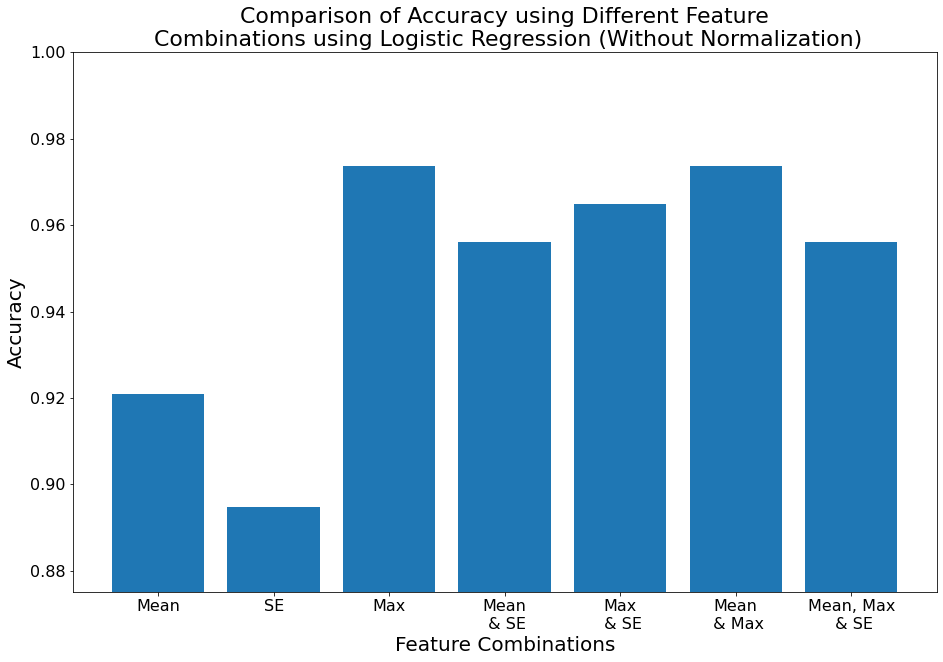

In [11]:
# The bar graph below shows the accuracy for the training set. A similar procedure was followed for the test set as well.
fig = plt.figure(figsize=(8,5))
ax = fig.add_axes([0,0,1.5,1.5])
plt.rcParams["font.family"] = "Times New Roman"
feature_comb = ['Mean', 'SE', 'Max', 'Mean\n & SE', 'Max\n & SE', 'Mean\n & Max', 'Mean, Max\n & SE']
accuracy = [0.9210,0.8947,0.9737,0.9561,0.9649,0.9737,0.9561]
ax.bar(feature_comb,accuracy)
ax.set_xlabel('Feature Combinations',fontsize = 20)
ax.set_ylabel('Accuracy',fontsize = 20)
ax.set_title('Comparison of Accuracy using Different Feature\n Combinations using Logistic Regression (Without Normalization)',fontsize = 22)

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_ylim([0.875,1])
plt.tight_layout()
plt.savefig('lr_un',bbox_inches='tight')